# Data analysis of the Titanic dataset

### Importing the libraries

In [127]:
#Start by importing libraries necessary for this project. 
import numpy as np
import pandas as pd

#Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Statistical packages
from scipy import stats

#Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


### Importing the dataset

In [128]:
#Reading the data
df = pd.read_csv('train.csv')
#inspect the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

#### Description of the dataset

In [129]:
#The categorical variables are Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Cabin, Embarked. The numerical variables are PassengerId, Age, Fare. 
# Decription of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [130]:
#From the above description we can see that survival rate is 38%. 
#Data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Missing values

In [131]:
#From the above information we can see that there are missing values in Age, Cabin and Embarked columns. 
#Regarding the datatype there are 5 integer columns, 2 float columns and 5 object columns.

#Assesment of missing values
#calculate the percentage of missing values in each column
df.isnull().sum()/len(df)*100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

##### Cabin missing values

In [132]:
#We are not going to lose all that information. We will try to fill the missing values with a not applicable category. 
#we are going to impute the missing values with a Z99 value.
df['Cabin'] = df['Cabin'].fillna('Z99')

# and now we are going to validate that the missing values were replaced with the 00 value.
df['Cabin'].isnull().sum()

0

##### Age missing values

In [133]:
#Now let's explore the Age column.
#First we are going to check the rows with missing values in the Age column.
df[df['Age'].isnull()].head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Z99,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,Z99,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,Z99,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,Z99,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Z99,Q


c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

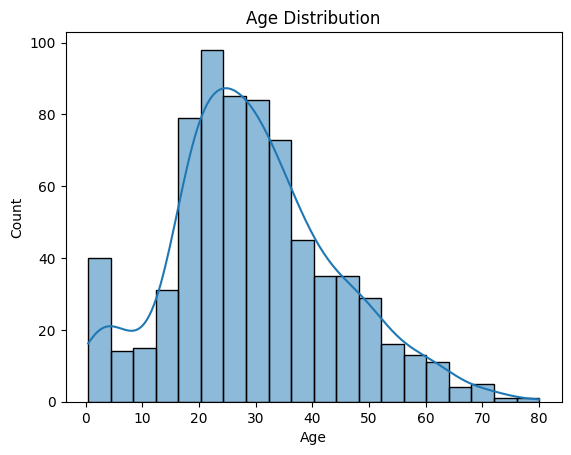

In [134]:
#Let's see the distribution of the Age column using sns histogram.
sns.histplot(data=df, x='Age', kde=True  )
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show

c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

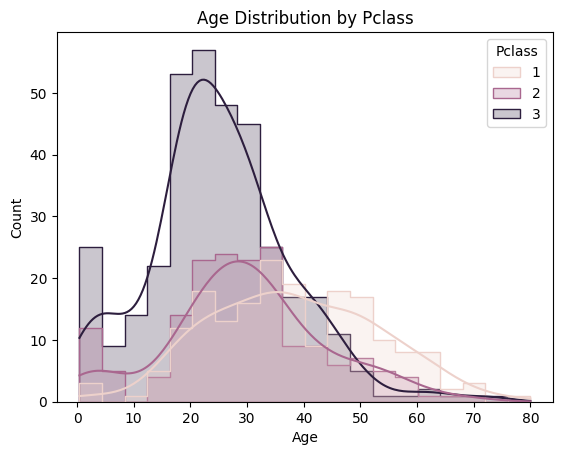

In [135]:
#Let's see the distribution of the Age column using sns histogram.
sns.histplot(data=df, x='Age', kde=True, hue='Pclass', element="step", common_norm=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Pclass')
plt.show

#There is just a slight difference in the distribution of the Age column by sex at this point so we are not using that column. 

c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

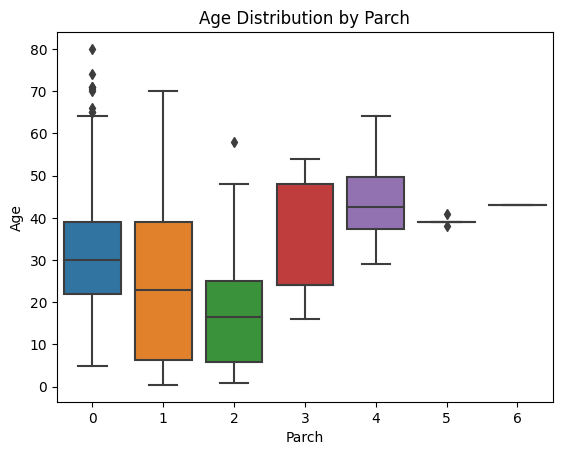

In [136]:
#Given the low resolution that a histogram would provide we are going to use a boxplot to see the distribution of the Age column by Parch.
sns.boxplot(data=df, x='Parch', y='Age')
plt.xlabel('Parch')
plt.ylabel('Age')
plt.title('Age Distribution by Parch')
plt.show


c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<function matplotlib.pyplot.show(close=None, block=None)>

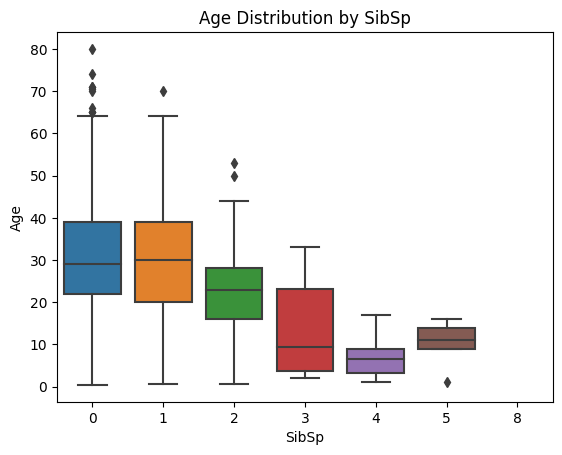

In [137]:
#Lets improve the former impute by analyzing if there is a correlation between siblings column as most young people travel with their siblings.
#Let's see the distribution of the Age column using sns boxplot.
sns.boxplot(data=df, x='SibSp', y='Age')
plt.xlabel('SibSp')
plt.ylabel('Age')
plt.title('Age Distribution by SibSp')
plt.show


In [138]:
#We are going to make an imputer that takes the median age group by Pclass and Parch and siblings imputes the missing values with the median age of the group.
#First we are going to create a variable that groups the data by Pclass, Parch and  siblings and calculates the median age of each group.
age_group = df.groupby(['Pclass', 'Parch', 'SibSp'])['Age'].median()


In [139]:
#Now we are going to create a function that takes the Pclass, Parch values and siblings and returns the median age of the group if the age is missing.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    Parch = cols[2]
    SibSp = cols[3]
    
    if pd.isnull(Age):
        return age_group[Pclass, Parch, SibSp]
    else:
        return Age
    



In [140]:
#Now we are going to apply the impute_age function to the Age column.
df['Age'] = df[['Age', 'Pclass', 'Parch', 'SibSp']].apply(impute_age, axis=1)
#Now we are going to validate that the missing values were replaced with the median age of the group.
df['Age'].isnull().sum()

C:\Users\Jhon Rodriguez\AppData\Local\Temp\ipykernel_15900\3053019255.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Jhon Rodriguez\AppData\Local\Temp\ipykernel_15900\3053019255.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]
C:\Users\Jhon Rodriguez\AppData\Local\Temp\ipykernel_15900\3053019255.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Parch = cols[2]
C:\Users\Jhon Rodriguez

7

In [141]:
#This is important the age column still has 7 missing values. Let's check the rows with missing values in the Age column.
#And it shows a problem with the code, if there were no values in a category the imputation would not give any value
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,Z99,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,Z99,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,Z99,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,Z99,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,Z99,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,Z99,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,Z99,S


In [142]:
# Manually impute ages for the Sage family members based on available internet information
# https://www.bbc.com/news/uk-england-cambridgeshire-17596264
age_imputations = {
    160: 5,   # Thomas Henry Sage
    181: 8,   # Constance Gladys Sage
    202: 17,  # Frederick Sage
    325: 20,  # George John Sage Jr
    793: 21,  # Stella Anna Sage
    847: 18,  # Douglas Bullen Sage
    864: 15   # Dorothy Edith Sage
}

# Update the 'Age' column using PassengerId and imputations
df['Age'] = df['PassengerId'].map(age_imputations).fillna(df['Age'])

# Validate that missing values were replaced
missing_age_count = df['Age'].isnull().sum()
print(f"Number of missing ages after imputation: {missing_age_count}")

Number of missing ages after imputation: 0


just as a training exercise if we wanted to impute those kid ages we would have to use 
the category closest to a median of 15, which was the in Pclass 3, Parch 2 and SibSp 2
and the median age of that group was 15.5
This would come in handy if we encounter this during the test phase.

c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Jhon Rodriguez\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

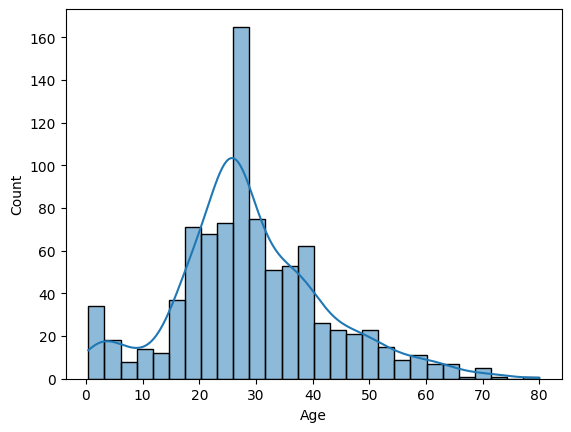

In [143]:
#last let's chech with a histogram the distribution of the Age column.
sns.histplot(data=df, x='Age', kde=True  )
#Comment: The distribution of the Age column is not perfect but it is better than the previous one, so we are going to keep it. The other option would
#to perform a more complex imputation using the name column to extract the title and then impute the missing values with the median age of the group by title.
#or even more complex using a KNN imputer. But for the purpose of this project we are going to keep this imputation.

From the previous histogram we can see that there is a peak in the 20-30 age range. But we can work with this distribution.

##### Embark missing values

In [144]:
#By now we have imputed the missing values in the Age column based on the Pclass column. That allows us to keep the distribution of the Age column by Pclass while imputing the missing values.
#Now let's explore the Embarked column.
#First we are going to check the rows with missing values in the Embarked column.
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [145]:
#This means that the two rows with missing values in the Embarked column are from the 1st class and they have the same ticket number.
#The same ticket number means that they were travelling together. And  the fact that they were travelling together and they were from the 1st class means that they were probably from the same family.
#let's check the most common values in the Embarked column by Pclass.
df.groupby('Pclass')['Embarked'].value_counts()


Pclass  Embarked
1       S           127
        C            85
        Q             2
2       S           164
        C            17
        Q             3
3       S           353
        Q            72
        C            66
Name: count, dtype: int64

In [146]:
#From the above results we can see that the mode value in the Embarked column for the 1st class is S.
#Now let's impute the missing values in the Embarked column with the mode value for the class. 
df['Embarked'] = df['Embarked'].fillna('S')


In [147]:
#Now let's check the missing values in the dataset.
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In conclusion we have imputed the missing values in the Age, cabin and Embarked columns. 

#The column with biggest number of missing values was the Cabin column. We have imputed the missing values in the Cabin column with a Z99 value.
The column with the second biggest number of missing values was the Age column. We have imputed the missing values in the Age column with the median of the Age column by Pclass, Parch, and SibSp.

Finally we have imputed the missing values in the Embarked column with the most common value in the Embarked column for the 1st class.


#### Exploring the data

In [148]:

#Now let's explore duplicates in the dataset. The column that we are going to use to check for duplicates is the PassengerId column.
#First we are going to check the number of duplicates in the dataset.
df.duplicated(subset='PassengerId').sum()

0

In [149]:
#There were 0 duplicates in the dataset. 
#Now let's explore the distribution of the numerical variables.
#First we are going to check the distribution of the Age column to check wbich bins we are going to use. 
df['Age'].describe()

count    891.000000
mean      29.162929
std       13.391615
min        0.420000
25%       22.000000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

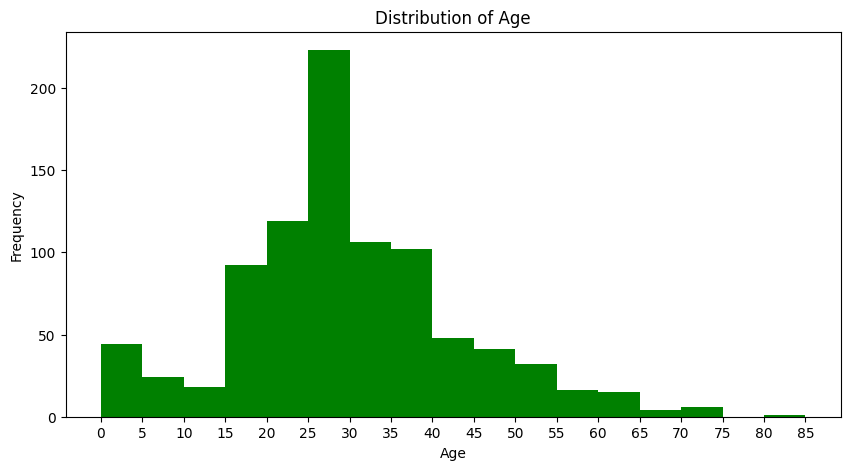

In [150]:
#From the above results we can see that the minimum age is 0.42 and the maximum age is 80.
#Now let's create an histogram to check the distribution of the Age column.
plt.figure(figsize=(10,5))
plt.hist(df['Age'], bins=(range(0,90,5)), color='green')
plt.xlabel('Age')
#let's edit the ticks 
plt.xticks(range(0,90,5))
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()
